In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [176]:
tiktok = pd.read_csv('tiktok.csv')

In [177]:
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [178]:
tiktok.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [179]:
tiktok.shape

(19382, 12)

In [180]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [181]:
tiktok.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [182]:
tiktok=tiktok.dropna(axis=0)

In [183]:
tiktok.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [184]:
tiktok.duplicated().sum()

0

In [185]:
tiktok['claim_status'].value_counts(normalize=True) #Normalize True to get counts proportion or percentage instead of raw counts.

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

In [186]:
#New column named text_length to get length of video_transcription_text
tiktok['text_length'] = tiktok['video_transcription_text'].str.len() #.str.len() is a string method in pandas
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [187]:
#Mean of text_length based on claim_status
tiktok['text_length'].groupby(tiktok['claim_status']).mean()

claim_status
claim      95.376978
opinion    82.722562
Name: text_length, dtype: float64

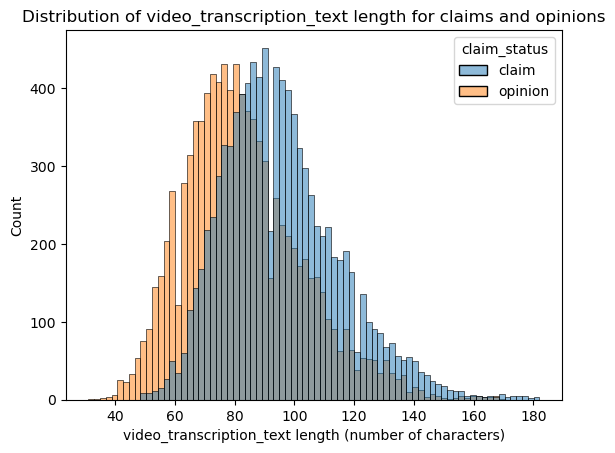

In [188]:
# Visualize the distribution of `text_length` for claims and opinions
sns.histplot(data=tiktok, stat="count",  x="text_length",
              hue="claim_status",
              legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

- Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters&mdash;about 13 more on average, as indicated in a previous cell.

In [189]:
#Encoding of claim_status column
tiktok['claim_status'] = np.where(tiktok['claim_status'] == 'opinion',0,1)
tiktok.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,1,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,1,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,1,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,1,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,1,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [190]:
#Feature Selection and Transformation

X = tiktok.copy()
X = pd.get_dummies(X, columns=['verified_status','author_ban_status'], drop_first=True)
X.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,1,7017666017,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,2,1,4014381136,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,3,1,9859838091,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,4,1,1866847991,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,5,1,7105231098,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


In [191]:
# Split the data
y = X['claim_status'] #Target variable

In [192]:
X = X.drop(['#','video_id','claim_status','video_transcription_text'], axis=1) #Predicted Variables
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,0,0,1
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,0,0,0
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,0,0,0
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,0,0,0
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,0,0,0


<Axes: >

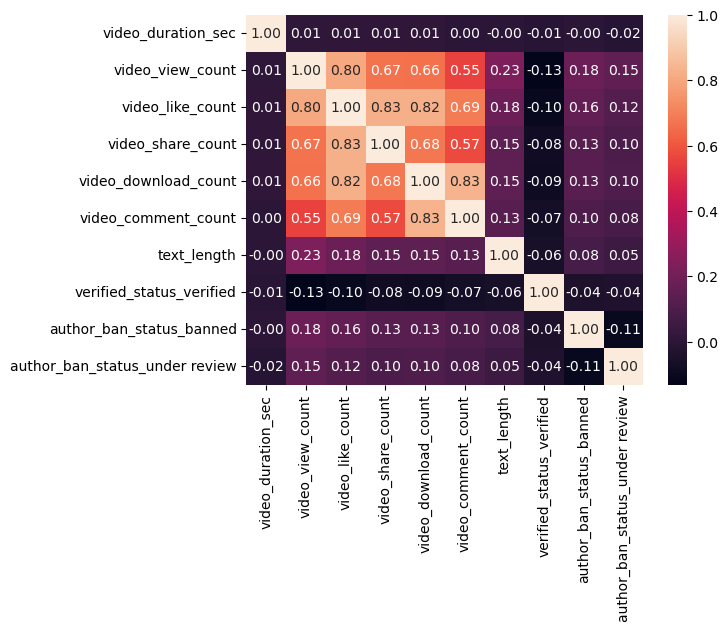

In [193]:
# Checking for correlation in between the independent variables
corr_mat = X.corr()
sns.heatmap(corr_mat, annot=True, fmt='.2f')

In [194]:
# Dropping the highly correlated variables
X=X.drop(['video_like_count','video_share_count','video_download_count'], axis=1)

## Train, Validate and Test data sets

In [195]:
# Create train, validate and test data sets
from sklearn.model_selection import train_test_split

In [196]:
# Spliting data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [197]:
# Spliting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr,y_tr, test_size = 0.25, random_state=42)

In [198]:
#Checking shape of training, validation and testing data sets
X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((11450, 7), (3817, 7), (3817, 7), (11450,), (3817,), (3817,))

## Model Building

In [199]:
# Import libraries for model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Random Forest

In [200]:
# Train model on Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [201]:
#Making predictions
y_pred = rf.predict(X_test)

In [202]:
#Model evaluation using metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score,recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [203]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9950222687974849


In [204]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1889
           1       1.00      0.99      1.00      1928

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [205]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.99528425 0.99580823 0.99318837 0.99397433 0.99633124]


### Gradient Boosting

In [206]:
# Train model on Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [207]:
y_prd = gb.predict(X_test)

In [208]:
accuracy = accuracy_score(y_test, y_prd)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9934503536809012


In [209]:
print("Classification Report:")
print(classification_report(y_test, y_prd))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1889
           1       1.00      0.99      0.99      1928

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



In [210]:
cv_scores = cross_val_score(gb, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.99502227 0.99554624 0.99240241 0.99318837 0.99528302]


## Evaluate Models

- Evaluate models against validation data


### Random Forest

In [211]:
#Prediction on validation set
y_pred = rf.predict(X_val)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [212]:
#True labels of validation set
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int32

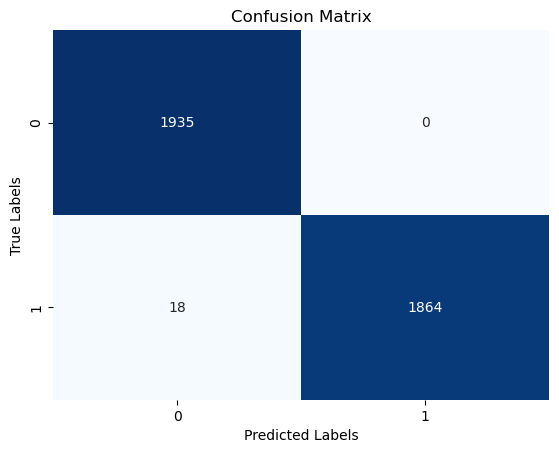

In [213]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [214]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      1.00      1882

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



-  The classification report shows that the random forest model scores are nearly perfect.

### Gradient Boosting

In [215]:
y_prd = gb.predict(X_val)
y_prd

array([1, 0, 0, ..., 0, 0, 1])

In [216]:
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int32

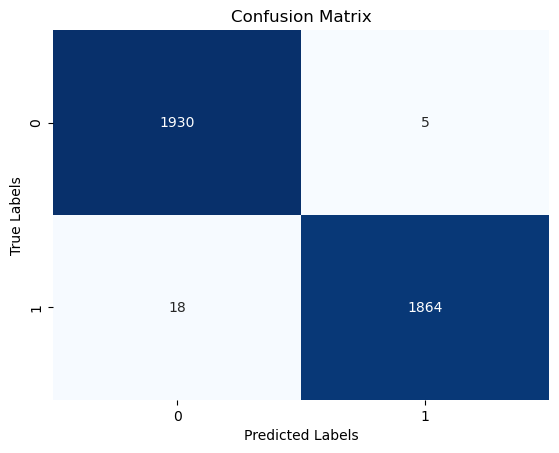

In [217]:
cm = confusion_matrix(y_val, y_prd)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [218]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_prd, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1935
       claim       1.00      0.99      0.99      1882

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



- The classification report of Gradient boosting is also nearly perfect but not as much as Random forest. So Random forest model becomes our champion model.